In [3]:
import xarray as xr #Similar ao pandas mas com melhor eficiencia para trabalhar com matrizes multidimensionais, muito bom para dados georref
import numpy as np
from scipy.stats import weibull_min
from py_wake.site.xrsite import XRSite
from py_wake.site.shear import PowerShear
import matplotlib.pyplot as plt
from py_wake.flow_map import XYGrid, YZGrid, XZGrid
from pyproj import Proj, Transformer
from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd
from topfarm.utils import regular_generic_layout, regular_generic_layout_gradients
import topfarm
from scipy.stats import weibull_min
import os
import numpy as np
import matplotlib.pyplot as plt
from py_wake.wind_turbines import WindTurbine, WindTurbines
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular
import pandas as pd

In [4]:
f = [0.036, 0.039, 0.052, 0.07, 0.084, 0.064, 0.086, 0.118, 0.152, 0.147, 0.1, 0.052]
A = [9.177, 9.782, 9.532, 9.91, 10.043, 9.594, 9.584, 10.515, 11.399, 11.687, 11.637, 10.088]
k = [2.393, 2.447, 2.412, 2.592, 2.756, 2.596, 2.584, 2.549, 2.471, 2.607, 2.627, 2.326]
wd = np.linspace(0, 360, len(f), endpoint=False)
ti = .1

In [5]:
maior_f= f.index(max(f))

In [6]:
valor_A= A[maior_f]
valor_k= k[maior_f]

In [7]:
valor_A

11.399

In [8]:
valor_k

2.471

In [9]:
x=np.arange(0,26,1)

In [10]:
weibull_min.pdf(x, valor_k, scale=valor_A)

array([0.        , 0.00602966, 0.01653028, 0.02931968, 0.04308536,
       0.0566058 , 0.0687194 , 0.07840185, 0.08486897, 0.08766605,
       0.08671841, 0.08232859, 0.07511796, 0.0659235 , 0.05567013,
       0.04524329, 0.03538473, 0.02662722, 0.01927334, 0.01341371,
       0.00897254, 0.00576569, 0.00355744, 0.00210642, 0.00119628,
       0.00065127])

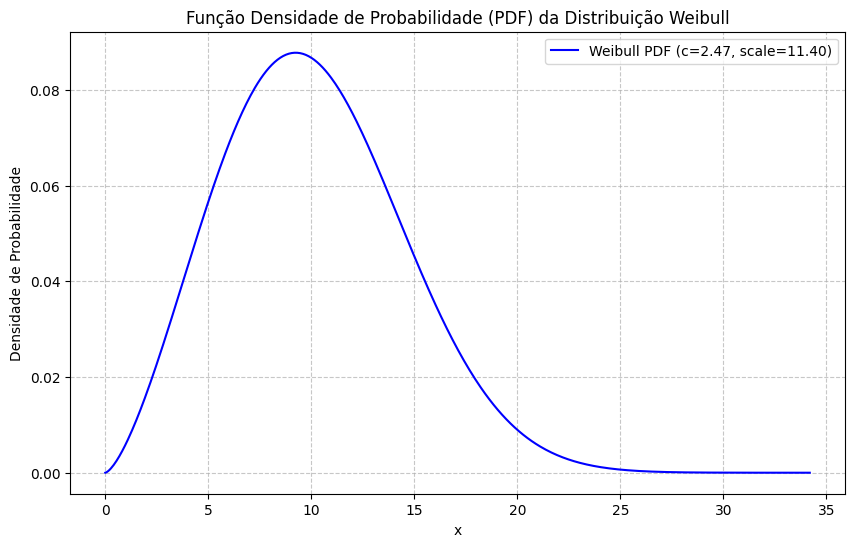

In [14]:
# Gerar um intervalo de x para plotar a função.
# O início deve ser 0 (já que a Weibull é definida para x >= 0).
# O fim depende dos seus parâmetros. Uma boa regra é ir até 3-5 vezes o parâmetro de escala.
intervalo = np.linspace(0, valor_A * 3, 500) # De 0 até 3 vezes o valor de A, com 500 pontos

# Calcular os valores da PDF para cada x
# Usando valor_k como forma (c) e valor_A como escala (scale)
pdf_valores = weibull_min.pdf(x, c=valor_k, scale=valor_A)
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
plt.plot(x, pdf_valores, label=f'Weibull PDF (c={valor_k:.2f}, scale={valor_A:.2f})', color='blue')
plt.title('Função Densidade de Probabilidade (PDF) da Distribuição Weibull')
plt.xlabel('x')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True, linestyle='--', alpha=0.7) # Adiciona um grid para melhor leitura
plt.legend() # Mostra a legenda
plt.show() # Exibe o gráfico